In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [176]:
#파일 불러오기
df_isbuy_raw = pd.read_csv(os.getcwd()+'/member_isbuy_sheet.csv')
df_isbuy_raw.head()




,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,구매여부
0,0,cgh1385,53,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,구매
1,1,pjkl77,28,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,구매
2,2,bear011,40,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,구매
3,3,kim0750,44,0,남자,경상북도 구미시 송동로7길 31-3 (도량동),2017-01-18 오후 4:28,2017-01-18 오후 4:41,SNS광고,PC,2017-01-18,사업자,사업자,구매
4,4,nonane9979,45,0,남자,부산광역시 금정구 중앙대로 1607 (부곡동),2017-02-13 오후 2:54,2017-02-13 오후 3:12,블로그광고,PC,2017-01-18,사업자,사업자,구매


In [177]:
type(df_isbuy_raw.loc[0,'회원 가입일'])

str

In [178]:
import datetime
year = []
day = []
month = []
for i in range(len(df_isbuy_raw)):
    y,m,d = df_isbuy_raw.loc[i,'회원 가입일'].split('-')
     
    year.append(y+m)
    month.append(m)
    day.append(d)


In [179]:
df_isbuy_raw['가입월'] = year

df_isbuy_raw['가입일'] = day
df_isbuy_raw.groupby('가입월').count()


,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,구매여부,가입일
가입월,,,,,,,,,,,,,,,
201612,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
201701,8,8,8,8,8,8,8,6,8,8,8,8,8,8,8
201702,15,15,15,15,15,15,13,10,15,15,15,15,15,15,15
201703,30,30,30,30,30,26,28,22,30,30,30,30,30,30,30
201704,34,34,34,34,34,29,34,24,34,34,34,34,34,34,34
201705,66,66,66,66,66,63,61,52,66,66,66,66,66,66,66
201706,59,59,59,59,59,53,57,44,59,59,59,59,59,59,59
201707,38,38,38,38,38,35,34,25,38,38,38,38,38,38,38
201708,30,30,30,30,30,28,29,21,30,30,30,30,30,30,30


In [185]:
from pylab import plot, show
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df_month = df_isbuy_raw[['가입월','가입일']]
df_month
df_month = df_month.groupby('가입월').count()
df_month = df_month.reset_index()
df_month
df_month.columns = ['가입월','가입일']
index = df_month[df_month['가입월']=='201906'].index
df_month = df_month.drop(index)
df_month


,가입월,가입일
0,201612,1
1,201701,8
2,201702,15
3,201703,30
4,201704,34
5,201705,66
6,201706,59
7,201707,38
8,201708,30
9,201709,33


In [107]:
df_seex = df_isbuy_raw.groupby('성별').count()
df_seex = df_seex.reset_index()
df_seex = df_seex[['성별','ID']]
df_seex

,성별,ID
0,남자,6053
1,여자,522


In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

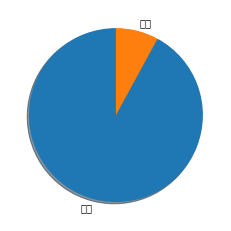

In [111]:
plt.pie(df_seex['ID'],labels = df_seex['성별'], shadow=True, startangle=90)
plt.show()

In [117]:
age = df_isbuy_raw['나이']
age_tmp = []
for i in age:
    if i<20: age_tmp.append('10대')
    elif 20<=i<30: age_tmp.append('20대')
    elif 30<=i<40: age_tmp.append('30대')
    elif 40<=i<50: age_tmp.append('40대')
    elif 50<=i<60: age_tmp.append('50대')
    elif 60<=i<70: age_tmp.append('60대')
    elif 70<=i<80: age_tmp.append('70대')
    elif 80<=i<90: age_tmp.append('80대')
    elif 90<=i<100: age_tmp.append('90대')
    elif 100<=i<110: age_tmp.append('100대')
    else : age_tmp.append('other')
# age_tmp.value_counts()

AttributeError: 'list' object has no attribute 'value_counts'

In [118]:
df_isbuy_raw['나이'] = age_tmp

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


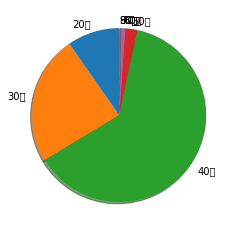

In [123]:
df_age = df_isbuy_raw.groupby('나이').count()
df_age = df_age.reset_index()
df_age = df_age[['나이','ID']]
df_age.columns = ['나이','빈도']
df_age

plt.pie(df_age['빈도'],labels = df_age['나이'], shadow=True, startangle=90)
plt.show()

In [139]:
df_isbuy_raw

df_inter = df_isbuy_raw.groupby('유입경로').count()
df_inter = df_inter.reset_index()
# df_inter
df_inter = df_inter[['유입경로','ID']]
df_inter.columns = ['유입경로','빈도']
df_inter = df_inter.sort_values('빈도')
df_inter = df_inter.reset_index()
df_inter
# x = df_inter['유입경로']
# y = df_inter['빈도']

# plt.bar(x,y)

,index,유입경로,빈도
0,3,신문광고,44
1,7,인터넷기사광고,161
2,11,카카오톡광고,182
3,1,기타,269
4,10,지인추천,390
5,6,인터넷검색,423
6,8,잡지광고,505
7,5,이메일광고,611
8,9,전단지광고,861
9,4,유튜브광고,944


In [150]:
import pyecharts
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib as font_manager
from matplotlib import rcParams
from pyecharts import Pie
import pandas as pd
import datetime

from matplotlib import font_manager, rc
df_inter['유입경로'][11]

'SNS광고'

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

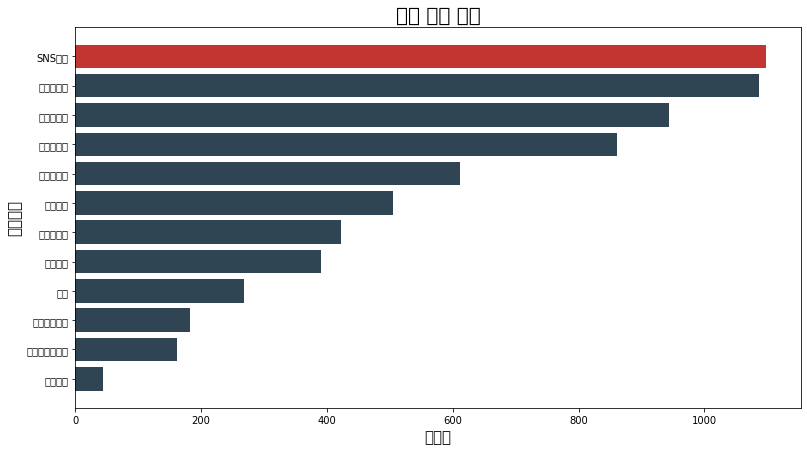

In [159]:
plt.fig, ax = plt.subplots(1,1,figsize=(13,7))

plt.bar = ax.barh(df_inter['유입경로'][0:11], df_inter['빈도'][0:11], label = "freq", color = "#2F4554")
plt.bar = ax.barh(df_inter['유입경로'][11], df_inter['빈도'][11], label = "freq", color = "#C23531")
plt.title("유입 경로 순위", size = 20)
plt.ylabel("유입경로", size = 15)
plt.xlabel("빈도수", size = 15)
plt.show()

In [161]:
df_isbuy_raw

df_digi = df_isbuy_raw.groupby('유입기기').count()
df_digi = df_digi.reset_index()
# df_inter
df_digi = df_digi[['유입기기','ID']]
df_digi.columns = ['유입경로','빈도']
df_digi = df_digi.sort_values('빈도')
df_digi = df_digi.reset_index()
df_digi
# x = df_inter['유입경로']
# y = df_inter['빈도']

# plt.bar(x,y)

,index,유입경로,빈도
0,1,모바일,2879
1,0,PC,3696


In [162]:
df_isbuy_raw


,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,구매여부,가입년도,가입월,가입일
0,0,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반,구매,2017,201701,01
1,1,pjkl77,20대,0,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:52,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,사업자,사업자,구매,2017,201701,14
2,2,bear011,40대,21908,남자,경기도 부천시 원미구 상일로 126 (상동),2018-12-19 오후 1:26,2018-12-19 오후 1:29,SNS광고,모바일,2017-01-17,사업자,사업자,구매,2017,201701,17
3,3,kim0750,40대,0,남자,경상북도 구미시 송동로7길 31-3 (도량동),2017-01-18 오후 4:28,2017-01-18 오후 4:41,SNS광고,PC,2017-01-18,사업자,사업자,구매,2017,201701,18
4,4,nonane9979,40대,0,남자,부산광역시 금정구 중앙대로 1607 (부곡동),2017-02-13 오후 2:54,2017-02-13 오후 3:12,블로그광고,PC,2017-01-18,사업자,사업자,구매,2017,201701,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6570,6570,wjdtnsghhh,40대,1000,남자,강원도 원주시 호저면 만종리 597,2019-05-30 오전 10:15,NaN,전단지광고,PC,2019-05-30,사업자,일반,비구매,2019,201905,30
6571,6571,102452849@n,40대,1000,남자,NaN,2019-05-31 오후 12:52,NaN,블로그광고,PC,2019-05-31,개인,일반,비구매,2019,201905,31
6572,6572,jsuee8228,40대,1000,남자,경상북도 구미시 산호대로29길 7-7 (옥계동),2019-06-21 오후 9:38,NaN,전단지광고,PC,2019-06-05,사업자,일반,비구매,2019,201906,05
6573,6573,aaok0204,40대,1000,남자,경상남도 창원시 의창구 북면 무동로267번길 10,2019-06-12 오후 7:59,NaN,인터넷검색,모바일,2019-06-12,사업자,일반,비구매,2019,201906,12
